# Finding optimal model

## Prepare dataset:

In [1]:
from google.colab import files
files.upload()

Saving Henry_Hub_Natural_Gas_Spot_Price.csv to Henry_Hub_Natural_Gas_Spot_Price.csv


{'Henry_Hub_Natural_Gas_Spot_Price.csv': b'Henry Hub Natural Gas Spot Price\r\nhttps://www.eia.gov/dnav/ng/hist/rngwhhdM.htm\r\n09:14:33 GMT+0700 (Indochina Time)\r\nData Source: Thomson Reuters\r\nMonth,Henry Hub Natural Gas Spot Price Dollars per Million Btu\r\nAug 2024,1.98\r\nJul 2024,2.07\r\nJun 2024,2.53\r\nMay 2024,2.12\r\nApr 2024,1.6\r\nMar 2024,1.49\r\nFeb 2024,1.72\r\nJan 2024,3.18\r\nDec 2023,2.52\r\nNov 2023,2.71\r\nOct 2023,2.98\r\nSep 2023,2.64\r\nAug 2023,2.58\r\nJul 2023,2.55\r\nJun 2023,2.18\r\nMay 2023,2.15\r\nApr 2023,2.16\r\nMar 2023,2.31\r\nFeb 2023,2.38\r\nJan 2023,3.27\r\nDec 2022,5.53\r\nNov 2022,5.45\r\nOct 2022,5.66\r\nSep 2022,7.88\r\nAug 2022,8.81\r\nJul 2022,7.28\r\nJun 2022,7.7\r\nMay 2022,8.14\r\nApr 2022,6.6\r\nMar 2022,4.9\r\nFeb 2022,4.69\r\nJan 2022,4.38\r\nDec 2021,3.76\r\nNov 2021,5.05\r\nOct 2021,5.51\r\nSep 2021,5.16\r\nAug 2021,4.07\r\nJul 2021,3.84\r\nJun 2021,3.26\r\nMay 2021,2.91\r\nApr 2021,2.66\r\nMar 2021,2.62\r\nFeb 2021,5.35\r\nJan 2021,

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load your data (make sure to adjust the file path)
df = pd.read_csv('Henry_Hub_Natural_Gas_Spot_Price.csv', header=4, names=['Dates', 'Prices'])
df

,Dates,Prices
0,Aug 2024,1.98
1,Jul 2024,2.07
2,Jun 2024,2.53
3,May 2024,2.12
4,Apr 2024,1.60
...,...,...
327,May 1997,2.25
328,Apr 1997,2.03
329,Mar 1997,1.89
330,Feb 1997,2.15


In [4]:
print(df['Dates'].head(15))  # Check original dates
print(df['Dates'].isnull().sum())  # Check for any null values in original dates

0     Aug 2024
1     Jul 2024
2     Jun 2024
3     May 2024
4     Apr 2024
5     Mar 2024
6     Feb 2024
7     Jan 2024
8     Dec 2023
9     Nov 2023
10    Oct 2023
11    Sep 2023
12    Aug 2023
13    Jul 2023
14    Jun 2023
Name: Dates, dtype: object
0


In [5]:
# Convert 'Dates' column to datetime format
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')

# Filter data to include only from 2010 onward
df_filtered = df[df['Dates'] >= '2010-01-01']

# Sort the data in ascending order by 'Dates'
df_filtered = df_filtered.sort_values(by='Dates')

# Set the 'Dates' column as the index
df_filtered.set_index('Dates', inplace=True)
# df_filtered['Prices'] = np.log(df_filtered['Prices'])

# Check the resulting DataFrame
print(df_filtered.head(15))  # Confirm Dates index and data


            Prices
Dates             
2010-01-01    5.83
2010-02-01    5.32
2010-03-01    4.29
2010-04-01    4.03
2010-05-01    4.14
2010-06-01    4.80
2010-07-01    4.63
2010-08-01    4.32
2010-09-01    3.89
2010-10-01    3.43
2010-11-01    3.71
2010-12-01    4.25
2011-01-01    4.49
2011-02-01    4.09
2011-03-01    3.97


<ipython-input-5-ed7a188c645a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')


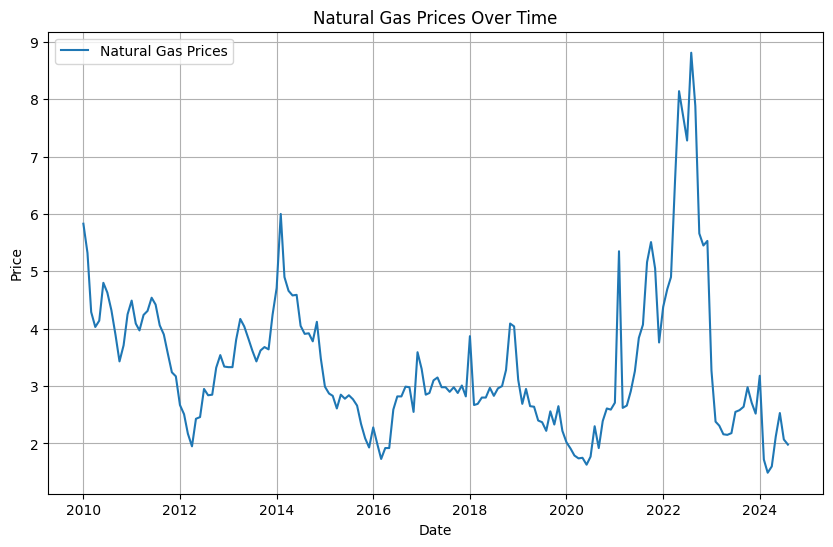

In [6]:
# Plot the time series to visualize the data
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['Prices'], label='Natural Gas Prices')
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 176 entries, 2010-01-01 to 2024-08-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prices  176 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


Checking for **stationarity**:

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [9]:
# Augmented Dickey-Fuller Test for stationarity
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

# Check stationarity
print("Before Differencing:")
adf_test(df_filtered['Prices'])


Before Differencing:
ADF Statistic: -3.401038
p-value: 0.010924
Critical Values:
	1%: -3.4691814633722453
	5%: -2.878595143532943
	10%: -2.5758625549741803


Handle **non-stationary**:

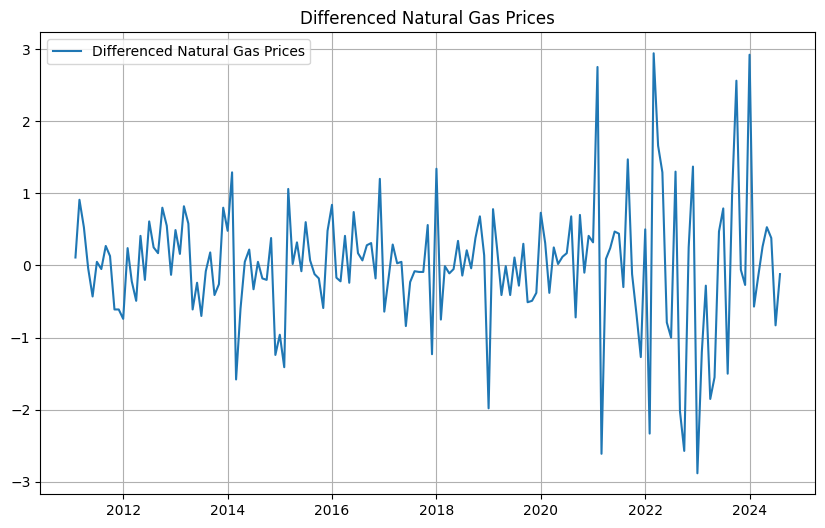

In [10]:
# Differencing to make the series stationary
  # Seasonal differencing
df_filtered['Prices_seasonal_diff'] = df_filtered['Prices'].diff(12)
  # Remove trend
df_filtered['Prices_diff'] = df_filtered['Prices_seasonal_diff'].diff(1)

# Plot differenced series
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['Prices_diff'], label='Differenced Natural Gas Prices')
plt.title('Differenced Natural Gas Prices')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Check stationarity after differencing
print("After Differencing:")
adf_test(df_filtered['Prices_diff'].dropna())

After Differencing:
ADF Statistic: -6.185282
p-value: 0.000000
Critical Values:
	1%: -3.4744158894942156
	5%: -2.880878382771059
	10%: -2.577081275821236


## Using Auto-Arima to find the optimal model:

In [12]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.7 MB/s eta 0:00:00


In [13]:
print(df_filtered.isnull().sum())

Prices                   0
Prices_seasonal_diff    12
Prices_diff             13
dtype: int64


In [21]:
data = df_filtered

# Use forward fill to fill missing values in 'Prices_seasonal_diff' and 'Prices_diff'
data['Prices_seasonal_diff'] = data['Prices_seasonal_diff'].fillna(method='ffill')
data['Prices_diff'] = data['Prices_diff'].fillna(method='ffill')

# As a backup, apply backward fill if forward fill doesn't handle all missing values
data['Prices_seasonal_diff'] = data['Prices_seasonal_diff'].fillna(method='bfill')
data['Prices_diff'] = data['Prices_diff'].fillna(method='bfill')

# Check if there are still any missing values left
print(data.isna().sum())


Prices                  0
Prices_seasonal_diff    0
Prices_diff             0
dtype: int64


In [23]:
data.head()

,Prices,Prices_seasonal_diff,Prices_diff
Dates,,,
2010-01-01,5.83,-1.34,0.11
2010-02-01,5.32,-1.34,0.11
2010-03-01,4.29,-1.34,0.11
2010-04-01,4.03,-1.34,0.11
2010-05-01,4.14,-1.34,0.11


In [25]:
# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to dataset
stepwise_fit = auto_arima(data['Prices_diff'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=12.02 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=601.433, Time=0.15 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=497.294, Time=1.25 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.78 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=599.483, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=601.352, Time=0.16 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=466.467, Time=2.34 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=13.45 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.80 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=464.928, Time=3.75 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=495.294, Time=2.12 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.71 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=466.338, Time=0.71 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=468.103, Tim

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  176
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood                -228.658
Date:                  Sun, 08 Sep 2024   AIC                            463.315
Time:                          08:33:42   BIC                            472.615
Sample:                      01-01-2010   HQIC                           467.091
                           - 08-01-2024                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -1.0676      0.046    -23.336      0.000      -1.157      -0.978
ar.S.L24      -0.4881      0.081     -6.014      0.000      -0.647      -0.329
sigma2         0.8675      0.066     13.219      0.000       0.739       0.996
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                46.58
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               5.89   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Testing model performance:**

Mean Squared Error: 3.715514815963713


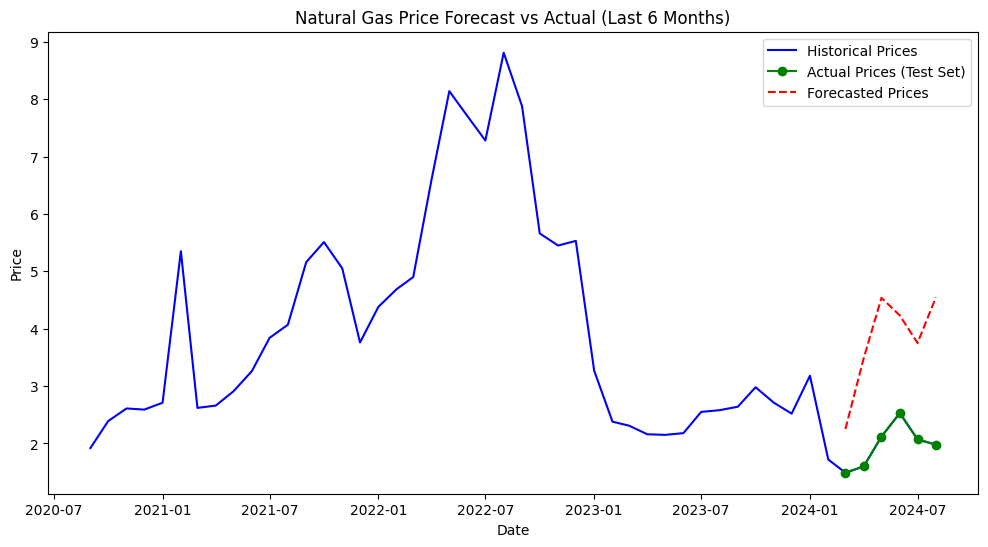

                 Date  Forecasted Price
2024-03-01 2024-03-01          2.252317
2024-04-01 2024-04-01          3.487386
2024-05-01 2024-05-01          4.537988
2024-06-01 2024-06-01          4.230601
2024-07-01 2024-07-01          3.750331
2024-08-01 2024-08-01          4.546615


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming df_filtered is already prepared with 'Prices_diff' and is indexed by 'Dates'

# Step 1: Split the data into training and testing sets
train_size = len(data) - 6  # Use all but the last 6 months for training
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Step 2: Fit the ARIMA model on the training data
model = ARIMA(train['Prices_diff'], order=(0, 0, 0), seasonal_order=(2, 1, 0, 12))
result = model.fit()

# Step 3: Generate forecasts for the test period
n_periods = len(test)  # Number of periods to forecast
forecast_diff = result.forecast(steps=n_periods)

# Step 4: Undo the first-order differencing
# Get the last known value from the training set
last_value_first_order = train['Prices_seasonal_diff'].iloc[-1]
forecast_reversed_first_order = forecast_diff.cumsum() + last_value_first_order

# Get the last known seasonal value from the training set to reverse seasonal differencing
last_value_seasonal = train['Prices'].iloc[-12]  # Assuming monthly data
forecast_reversed = forecast_reversed_first_order + last_value_seasonal

# Step 5: Prepare the DataFrame for the forecasted prices
forecast_df = pd.DataFrame({'Date': test.index, 'Forecasted Price': forecast_reversed})

# Step 6: Calculate performance metrics (e.g., Mean Squared Error)
mse = mean_squared_error(test['Prices'], forecast_reversed)
print(f'Mean Squared Error: {mse}')

# Step 7: Plot the historical prices, the test prices, and the forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[data.shape[0]-48:], data['Prices'][data.shape[0]-48:], label='Historical Prices', color='blue')
plt.plot(test.index, test['Prices'], label='Actual Prices (Test Set)', color='green', marker='o')
plt.plot(test.index, forecast_reversed, label='Forecasted Prices', color='red', linestyle='--')
plt.title('Natural Gas Price Forecast vs Actual (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 8: Print the forecasted prices
print(forecast_df)


# Forecast using ARIMA Model:

In [27]:
# Fit a ARIMA(0,0,0)(2,1,0)[12] on the training set
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Prices_diff'],
                order = (0, 0, 0),
                seasonal_order =(2, 1, 0, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Prices_diff   No. Observations:                  176
Model:             ARIMA(2, 1, 0, 12)   Log Likelihood                -228.658
Date:                Sun, 08 Sep 2024   AIC                            463.315
Time:                        08:34:39   BIC                            472.615
Sample:                    01-01-2010   HQIC                           467.091
                         - 08-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -1.0676      0.046    -23.336      0.000      -1.157      -0.978
ar.S.L24      -0.4881      0.081     -6.014      0.000      -0.647      -0.329
sigma2         0.8675      0.066     13.219      0.000       0.739       0.996
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                46.58
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               5.89   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

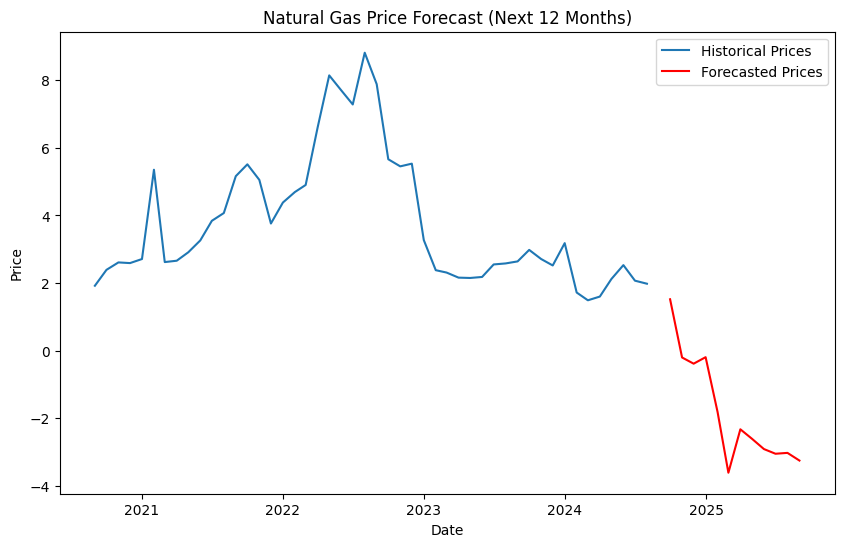

                 Date  Forecasted Price
2024-09-01 2024-09-30          1.520013
2024-10-01 2024-10-31         -0.200976
2024-11-01 2024-11-30         -0.383968
2024-12-01 2024-12-31         -0.191716
2025-01-01 2025-01-31         -1.814056
2025-02-01 2025-02-28         -3.608235
2025-03-01 2025-03-31         -2.324594
2025-04-01 2025-04-30         -2.603961
2025-05-01 2025-05-31         -2.908342
2025-06-01 2025-06-30         -3.047291
2025-07-01 2025-07-31         -3.021486
2025-08-01 2025-08-31         -3.248058


In [28]:
# Step 2: Fit the ARIMA model
model = ARIMA(data['Prices_diff'], order=(0, 0, 0), seasonal_order=(2, 1, 0, 12))
result = model.fit()

# Step 3: Forecast the next 12 months
n_periods = 12
forecast_diff = result.forecast(steps=n_periods)

# Step 4: Generate future dates (monthly frequency)
last_date = df_filtered.index[-1]
future_dates = pd.date_range(last_date, periods=n_periods + 1, freq='M')[1:]

# Step 5: Undo First-order Differencing (Lag 1)
# Get the last known value from the seasonal differenced series
last_value_seasonal_diff = df_filtered['Prices_seasonal_diff'].iloc[-1]

# Reverse the first-order differencing (cumulative sum + last known seasonal diff)
forecast_reversed_first_order = forecast_diff.cumsum() + last_value_seasonal_diff

# Step 6: Undo Seasonal Differencing (Lag 12)
# Get the last known value before seasonal differencing (lag 12)
last_value_seasonal = df_filtered['Prices'].iloc[-12]

# Reverse the seasonal differencing (add back last known seasonal value)
forecast_reversed = forecast_reversed_first_order + last_value_seasonal

# Step 7: Create a DataFrame for the forecasted prices (12 future months)
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted Price': forecast_reversed})

# Plot the historical prices and the forecasted prices
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index[data.shape[0]-48:], df_filtered['Prices'][data.shape[0]-48:], label='Historical Prices')
plt.plot(future_dates, forecast_reversed, label='Forecasted Prices', color='red')
plt.title('Natural Gas Price Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Print the forecasted prices
print(forecast_df)


# Trying with SARIMA:

**Data Preprocessing**

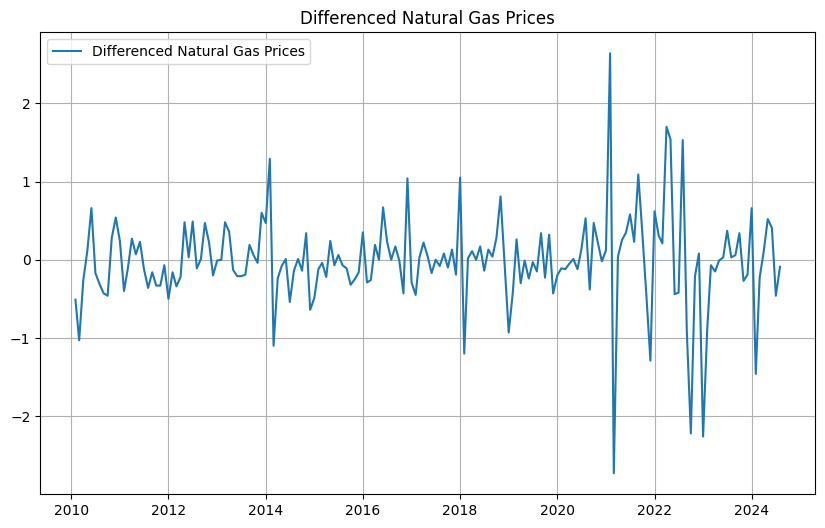

In [29]:
# Differencing to make the series stationary
  ## This time not removing the seasonality of the given data
df_filtered['Prices_diff'] = df_filtered['Prices'].diff(1)
df_filtered['Prices_diff'] = df_filtered['Prices_diff'].dropna()

# Plot differenced series
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['Prices_diff'], label='Differenced Natural Gas Prices')
plt.title('Differenced Natural Gas Prices')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
adf_test(df_filtered['Prices_diff'].dropna())

ADF Statistic: -6.109434
p-value: 0.000000
Critical Values:
	1%: -3.469413468959902
	5%: -2.8786964197028295
	10%: -2.5759166089965397


In [31]:
data = df_filtered

# Use forward fill to fill missing values in 'Prices_seasonal_diff' and 'Prices_diff'
data['Prices_diff'] = data['Prices_diff'].fillna(method='ffill')

# As a backup, apply backward fill if forward fill doesn't handle all missing values
data['Prices_diff'] = data['Prices_diff'].fillna(method='bfill')

# Check if there are still any missing values left
print(data.isna().sum())

Prices                  0
Prices_seasonal_diff    0
Prices_diff             0
dtype: int64


**Auto-Arima**

In [32]:
# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to dataset
stepwise_fit = auto_arima(data['Prices_diff'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.52 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=429.212, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=378.418, Time=0.35 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=427.229, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=430.041, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=370.157, Time=0.79 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=6.16 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=369.103, Time=0.71 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=376.551, Time=0.29 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.26 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=369.927, Time=0.83 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=371.724, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  176
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood                -180.555
Date:                  Sun, 08 Sep 2024   AIC                            367.111
Time:                          08:36:15   BIC                            376.410
Sample:                      01-01-2010   HQIC                           370.886
                           - 08-01-2024                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6817      0.062    -11.052      0.000      -0.803      -0.561
ar.S.L24      -0.2693      0.059     -4.559      0.000      -0.385      -0.154
sigma2         0.5107      0.032     15.781      0.000       0.447       0.574
===================================================================================
Ljung-Box (L1) (Q):                   0.96   Jarque-Bera (JB):               137.97
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               5.28   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Test Model**

Mean Squared Error: 0.3376310313243573


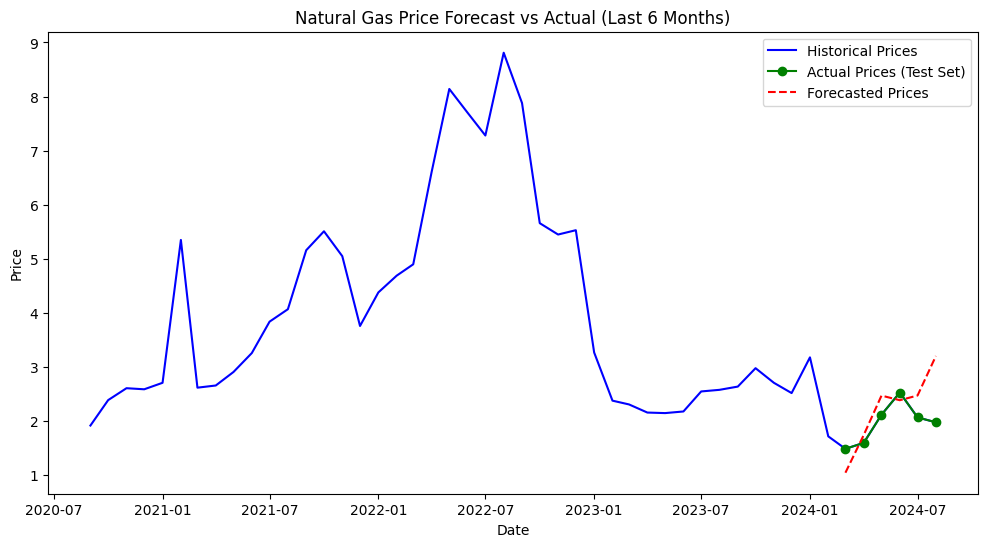

                 Date  Forecasted Price
2024-03-01 2024-03-01          1.048066
2024-04-01 2024-04-01          1.745718
2024-05-01 2024-05-01          2.473292
2024-06-01 2024-06-01          2.387959
2024-07-01 2024-07-01          2.475057
2024-08-01 2024-08-01          3.204820


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Step 1: Split the data into training and testing sets
train_size = len(data) - 6  # Use all but the last 6 months for training
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Step 2: Fit the ARIMA model on the training data
model = SARIMAX(train['Prices_diff'], order=(0, 0, 0), seasonal_order=(2, 1, 0, 12))
result = model.fit()

# Step 3: Generate forecasts for the test period
n_periods = len(test)  # Number of periods to forecast
forecast_diff = result.forecast(steps=n_periods)

# Step 4: Undo the first-order differencing
# Get the last known value from the training set
last_value_first_order = train['Prices'].iloc[-1]
forecast_reversed = forecast_diff.cumsum() + last_value_first_order

# Step 5: Prepare the DataFrame for the forecasted prices
forecast_df = pd.DataFrame({'Date': test.index, 'Forecasted Price': forecast_reversed})

# Step 6: Calculate performance metrics (e.g., Mean Squared Error)
mse = mean_squared_error(test['Prices'], forecast_reversed)
print(f'Mean Squared Error: {mse}')

# Step 7: Plot the historical prices, the test prices, and the forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[data.shape[0]-48:], data['Prices'][data.shape[0]-48:], label='Historical Prices', color='blue')
plt.plot(test.index, test['Prices'], label='Actual Prices (Test Set)', color='green', marker='o')
plt.plot(test.index, forecast_reversed, label='Forecasted Prices', color='red', linestyle='--')
plt.title('Natural Gas Price Forecast vs Actual (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 8: Print the forecasted prices
print(forecast_df)


**Build Model**

In [34]:
# Fit a SARIMA(0,0,0)(2,1,0)[12] on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(data['Prices_diff'],
                order = (0, 0, 0),
                seasonal_order =(2, 1, 0, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:              Prices_diff   No. Observations:                  176
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood                -180.555
Date:                  Sun, 08 Sep 2024   AIC                            367.111
Time:                          08:36:40   BIC                            376.410
Sample:                      01-01-2010   HQIC                           370.886
                           - 08-01-2024                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6817      0.062    -11.052      0.000      -0.803      -0.561
ar.S.L24      -0.2693      0.059     -4.559      0.000      -0.385      -0.154
sigma2         0.5107      0.032     15.781      0.000       0.447       0.574
===================================================================================
Ljung-Box (L1) (Q):                   0.96   Jarque-Bera (JB):               137.97
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               5.28   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

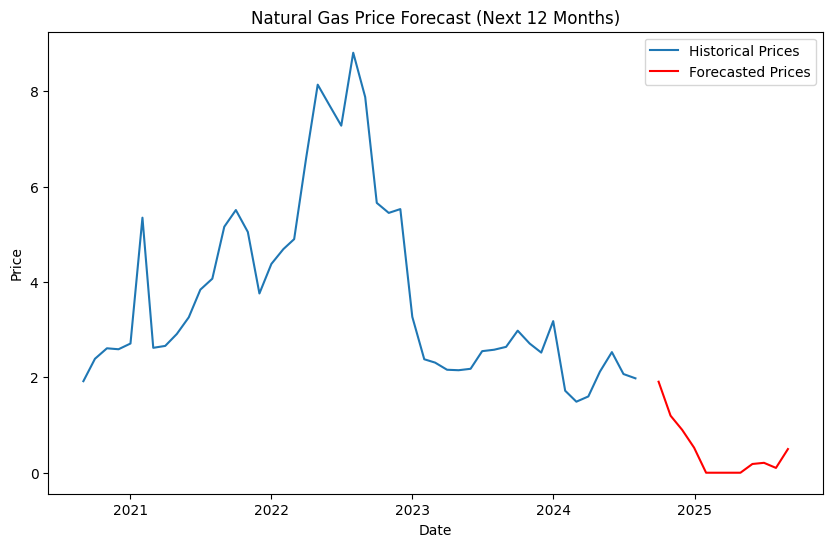

                 Date  Forecasted Price
2024-09-01 2024-09-30          1.909150
2024-10-01 2024-10-31          1.196204
2024-11-01 2024-11-30          0.899778
2024-12-01 2024-12-31          0.524878
2025-01-01 2025-01-31          0.000000
2025-02-01 2025-02-28          0.000000
2025-03-01 2025-03-31          0.000000
2025-04-01 2025-04-30          0.000000
2025-05-01 2025-05-31          0.183333
2025-06-01 2025-06-30          0.207726
2025-07-01 2025-07-31          0.100756
2025-08-01 2025-08-31          0.496515


In [35]:
# Forecast the next 12 months
n_periods = 12
forecast_diff = result.forecast(steps=n_periods)

# Generate future dates (monthly frequency)
# Use the last value in the 'Dates' column for future dates
last_date = df_filtered.index[-1]
future_dates = pd.date_range(last_date, periods=n_periods + 1, freq='M')[1:]

# Step 1: Get the last known value of the original Prices series before differencing
last_known_price = df_filtered['Prices'].iloc[-1]

# Step 2: Reverse the differencing by cumulatively summing the forecasted differences
forecast_reversed = forecast_diff.cumsum() + last_known_price
forecast_reversed[forecast_reversed < 0] = 0

# Now, create a DataFrame for the forecasted prices (12 future months)
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted Price': forecast_reversed})

# Plot the historical prices and the forecasted prices
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index[data.shape[0]-48:], df_filtered['Prices'][data.shape[0]-48:], label='Historical Prices')
plt.plot(future_dates, forecast_reversed, label='Forecasted Prices', color='red')
plt.title('Natural Gas Price Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Print the forecasted prices
print(forecast_df)
